# Exercise 2.2: Classification

In this exercise, you will develop and train a machine-learning classifier using 2D polynomial basis functions, following the example laid out on the lecture.

First we load the data from `classification_data.csv`. It contains the columns `x`, `y` and `class`. Your classifier should aim to predict `class` for a given $(x,y)$ tuple.

Text(0.5, 1.0, 'Labelled data')

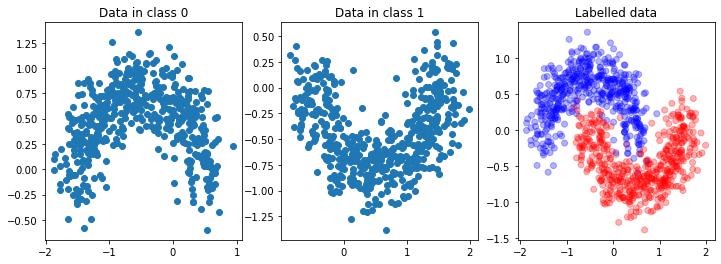

In [2]:
import pandas as pd
df = pd.read_csv("classification_data.csv")

from matplotlib import pyplot as plt
fig,axes = plt.subplots(1,3, figsize=(12,4))
for t in 0,1:
    class_data = df.loc[df["class"] == t]
    axes[t].scatter(class_data["x"], class_data["y"])
    axes[t].set_title(f"Data in class {t}")
axes[2].scatter(df["x"], df["y"], c=df["class"], cmap="bwr", alpha=0.3)
axes[2].set_title("Labelled data")

Your classifier will need a few features to be useful:

### Evaluation of the polynomial function

As in the lecture notes, you should implement a 2D polynomial function that resembles
$$
\phi(x,y|\mathbf{c}) = (c_{00} + c_{10} x + c_{01} y + c_{11} xy + c_{20} x^2 ...)
$$

or more generally

$$
\phi(x,y|\mathbf{c}) = \sum_{i=0}^n \sum_{j=0}^n c_{ij} x^i y^j
$$

where $\mathbf{c}$ is a matrix of coefficients.

Be aware that the CPU time scales very badly with the max degree $n$. A value of 3 or 4 should be sufficient.

### Evaluation of the objective function

Here you can just use a simple quadratic difference, as used in the least squares technique.

$$
f(\vec{(x,y,t)}|\mathbf{c}) = \sum_i \left(t_i - \phi(x_i,y_i|\mathbf{c})\right)^2
$$

where $\sum_i$ denotes the sum over the rows in the dataset $\vec{(x,y,t)}$, and $x$, $y$ and $t$ correspond to the columns `x`, `y` and `class`, respectively.

### Training

Training in this context is just performing a least squares fit to the data in order to obtain the best estimates of the coefficients $\mathbf{\hat{c}}$.

You can use [`scipy.optimize.minimize`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html). Remember that the first argument `fun` is the objective function $f$, not the polynomial function $\phi$. The second argument `x0` is a list of initial guesses of the coefficients.

The `minimize` function will return an `OptimizeResult` object, whose member `x` contains the optimised coefficients.

*e.g.* you can use it like this:
```python
class poly2D:
    #... partial example implementation
    def f(self, c, x, y t):
        """
            c is a list of coefficients
            x, y and t are lists of the same length
        """
        # return the sum of squares of t - \phi(x,y|c)
    def train(self, x, y, t):
        """
            x, y and t are lists of the same length
        """
        result = minimize(fun = self.f, x0 = self.coefficients, args = (x, y, t))
        self.coefficients = result.x
```

### Prediction

Finally, your classifier should be able to predict $t$ given a new value of $x$ and $y$.
This is just a matter of evaluating a "score" $ = \phi(x,y|\mathbf{\hat{c}})$ and choosing a value of $t$ based on a "cut" on that score.

The dataset is constructed such that 0.5 is already the optimal cut:
$$
t(x,y) =
\begin{cases}
    0, & \phi(x,y|\mathbf{\hat{c}}) \leq 0.5 \\
    1, & \phi(x,y|\mathbf{\hat{c}}) > 0.5 \\
\end{cases}
$$

1) Split the data randomly into training and testing samples.

Text(0.5, 1.0, 'Labelled test data')

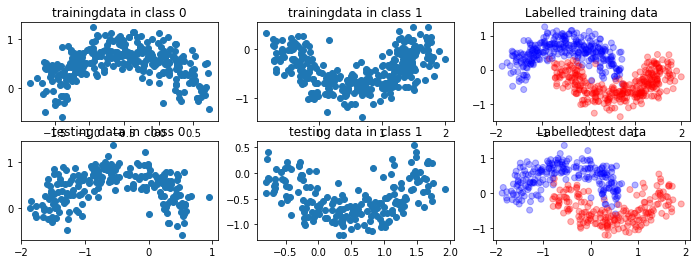

In [3]:
ratio = 0.6

training_data = df.sample(frac = ratio)
testing_data = df.drop(training_data.index)

fig,axes = plt.subplots(2,3, figsize=(12,4))

for t in 0,1:
    class_data = training_data.loc[training_data["class"] == t]
    axes[0][t].scatter(class_data["x"], class_data["y"])
    axes[0][t].set_title(f"trainingdata in class {t}")
axes[0][2].scatter(training_data["x"], training_data["y"], c=training_data["class"], cmap="bwr", alpha=0.3)
axes[0][2].set_title("Labelled training data")

for t in 0,1:
    class_data = testing_data.loc[testing_data["class"] == t]
    axes[1][t].scatter(class_data["x"], class_data["y"])
    axes[1][t].set_title(f"testing data in class {t}")
axes[1][2].scatter(testing_data["x"], testing_data["y"], c=testing_data["class"], cmap="bwr", alpha=0.3)
axes[1][2].set_title("Labelled test data")

2) Implement the classifier here and find the optimal coefficients $\mathbf{\hat{c}}$ by fitting the training sample.

In [4]:
import numpy as np
from scipy import optimize

class Classifier:
    coefficients = []   #numpy array of coefficients
                        #coeff[i,j] are c_i,j where i is x exponent and j y exponent
    shape = 0
    cut = 0
    
    def __init__(self, coef, shape, cut = 0.5):
        self.coefficients = coef
        self.shape = shape
        self.cut = cut

    def f(self, c, x, y, t):
        phi = np.polynomial.polynomial.polyval2d(x,y,np.reshape(c,self.shape))
        # print(phi)
        # print(c)
        sum = np.sum(np.power(np.add(t,-phi),2))
        # print(sum)
        return sum

    def phi(self, x, y):
        return np.polynomial.polynomial.polyval2d(x,y,np.reshape(self.coefficients,self.shape))

    def train(self,x,y,t):
        result = optimize.minimize(fun = self.f, x0 = self.coefficients, args = (x, y, t))
        print(result.success)
        self.coefficients = result.x

    def findCut(self, y, x):
        #print(y,x)
        return np.polynomial.polynomial.polyval2d(x,y,np.reshape(self.coefficients,self.shape)) - self.cut


#clssi = Classifier([[0,1,1,1],[1,1,1,1],[1,1,1,1],[1,1,1,1]], (4,4))
#clssi = Classifier([[0,0.5,0.5,0.5],[0.5,0.5,0.5,0.5],[0.5,0.5,0.5,0.5],[0.5,0.5,0.5,0.5]], (4,4))
clssi = Classifier([[0,0,0,0,0],[0,0,0,0,0],[0,0,0,0,0],[0,0,0,0,0],[0,0,0,0,0]], (5,5))

clssi.train(training_data["x"],training_data["y"],training_data["class"])

print(clssi.coefficients)

True
[ 0.49325024 -1.04219893 -0.01198201  0.56590501  0.00791711 -0.35303205
  0.37416018  0.42213204 -0.61954895  0.43526886  0.17063867 -0.55724114
 -0.13822084  1.38076724 -0.34977267  0.29051544 -0.19863606 -0.258738
  0.28960499  0.10599982 -0.07651433  0.39409268  0.03317329 -0.57244566
  0.18518178]


3) Now evaluate the classifier score $\phi(x,y|\mathbf{\hat{c}})$ on the testing sample. Plot histograms of the distributions of the score for each class (*i.e.* each true value of $t$).

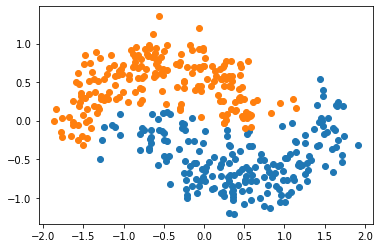

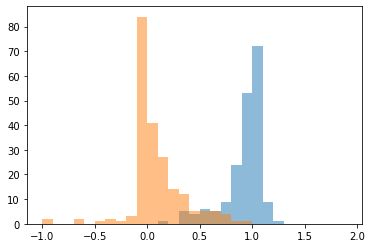

In [5]:
testing_data["test_score"] = clssi.phi(testing_data["x"],testing_data["y"])

# print(testing_data[testing_data["test_score"] > 0.5]["x"])
# print(testing_data[testing_data["test_score"] > 0.5]["y"])


plt.scatter(testing_data[testing_data["test_score"] > 0.5]["x"],testing_data[testing_data["test_score"] > 0.5]["y"])
plt.scatter(testing_data[testing_data["test_score"] < 0.5]["x"],testing_data[testing_data["test_score"] < 0.5]["y"])
plt.show()


plt.hist(testing_data[testing_data["class"] == 1]["test_score"], alpha = 0.5,bins=np.arange(-1, 2, 0.1),lw = 3, ls = "dashed")
plt.hist(testing_data[testing_data["class"] == 0]["test_score"], alpha = 0.5,bins=np.arange(-1, 2, 0.1),lw = 3, ls = "dashed")
plt.show()

4) Create a contour plot in the $x$–$y$ plane visualising the decision boundary $\phi(x,y|\mathbf{\hat{c}}) = 0.5$

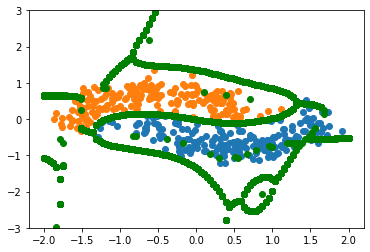

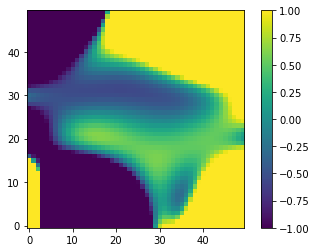

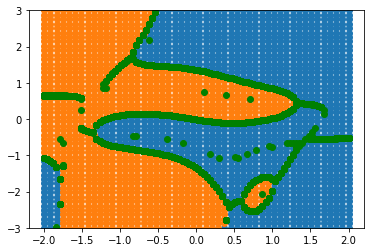

In [22]:
plt.scatter(testing_data[testing_data["test_score"] > 0.5]["x"],testing_data[testing_data["test_score"] > 0.5]["y"])
plt.scatter(testing_data[testing_data["test_score"] < 0.5]["x"],testing_data[testing_data["test_score"] < 0.5]["y"])
xLinspase = np.linspace(-2,2,num = 100)

yLinspace = [optimize.fsolve(clssi.findCut,2,args = [x]) for x in xLinspase]
y = [[optimize.fsolve(clssi.findCut,i,args = [x]) for x in xLinspase]for i in np.linspace(-5,5,100)]
for arr in y:
   plt.scatter(xLinspase, arr,color="green")

plt.ylim((-3,3))
plt.show()


xpoints=np.linspace(-2,2,50)
ypoints=np.linspace(-3,3,50)
dataX,dataY=np.meshgrid(xpoints,ypoints)
large=clssi.findCut(dataY,dataX).reshape((len(dataX),len(dataY)))
plt.imshow(large, origin="lower")
plt.clim(vmin=-1, vmax=1)
plt.colorbar()
plt.show()

plt.scatter(dataX[large > 0],dataY[large > 0])
plt.scatter(dataX[np.logical_not(large >0)],dataY[np.logical_not(large > 0)])
for arr in y:
   plt.scatter(xLinspase, arr,color="green")
plt.ylim((-3,3))
plt.show()

5) Plot the receiver operating characteristic (ROC) curve evaluated on the testing sample and calculate the area under the curve

0.9241706161137441 0.9470899470899471


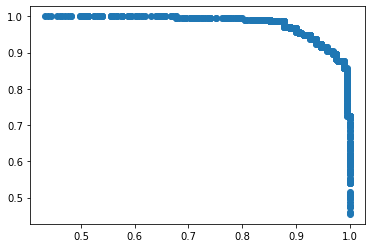

In [32]:
#calc efficiency

#class == 0 -> n -> 0 for phi
#class == 1 -> u -> 1 for phi

efficiency = np.count_nonzero(testing_data[testing_data["class"] == 0]["test_score"] < clssi.cut) / np.count_nonzero(testing_data["class"] == 0)
purity = 1 - np.count_nonzero(testing_data[testing_data["class"] == 1]["test_score"] < clssi.cut) / np.count_nonzero(testing_data["class"] == 1)

print(efficiency, purity)

eff = []
pi = []

for cut in np.linspace(0,1,1000):
    eff.append(np.count_nonzero(testing_data[testing_data["class"] == 0]["test_score"] < cut) / np.count_nonzero(testing_data["class"] == 0))
    pi.append(1 - np.count_nonzero(testing_data[testing_data["class"] == 1]["test_score"] < cut) / np.count_nonzero(testing_data["class"] == 1))

plt.scatter(pi,eff)
plt.show()